# Dataset

### Iris Flower Dataset


In [117]:
#https://www.kaggle.com/datasets/arshid/iris-flower-dataset

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 


In [4]:
df=pd.read_csv('C:/Anaconda3/iris_flower_project/IRIS.csv')

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

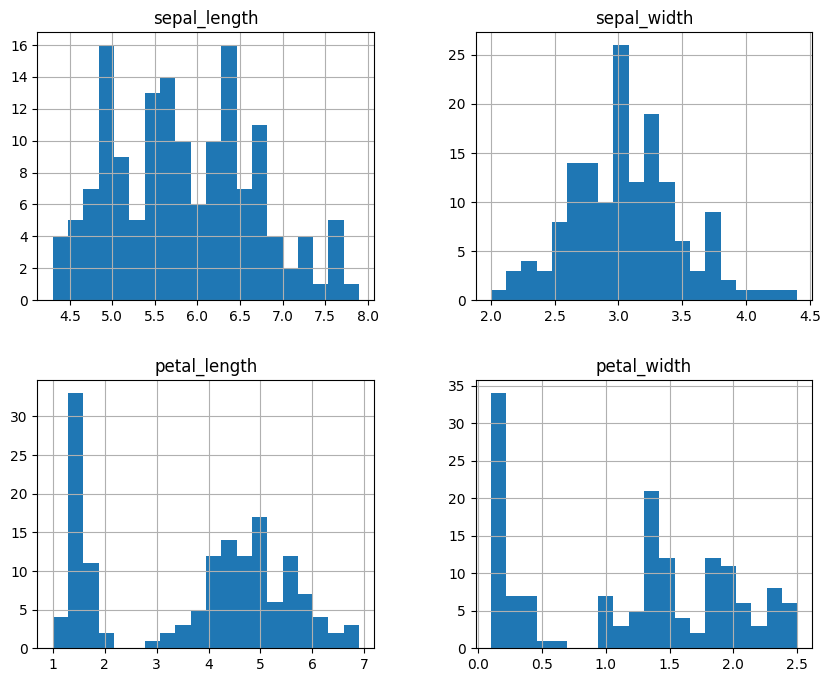

In [23]:
df.hist(figsize=(10, 8), bins=20)


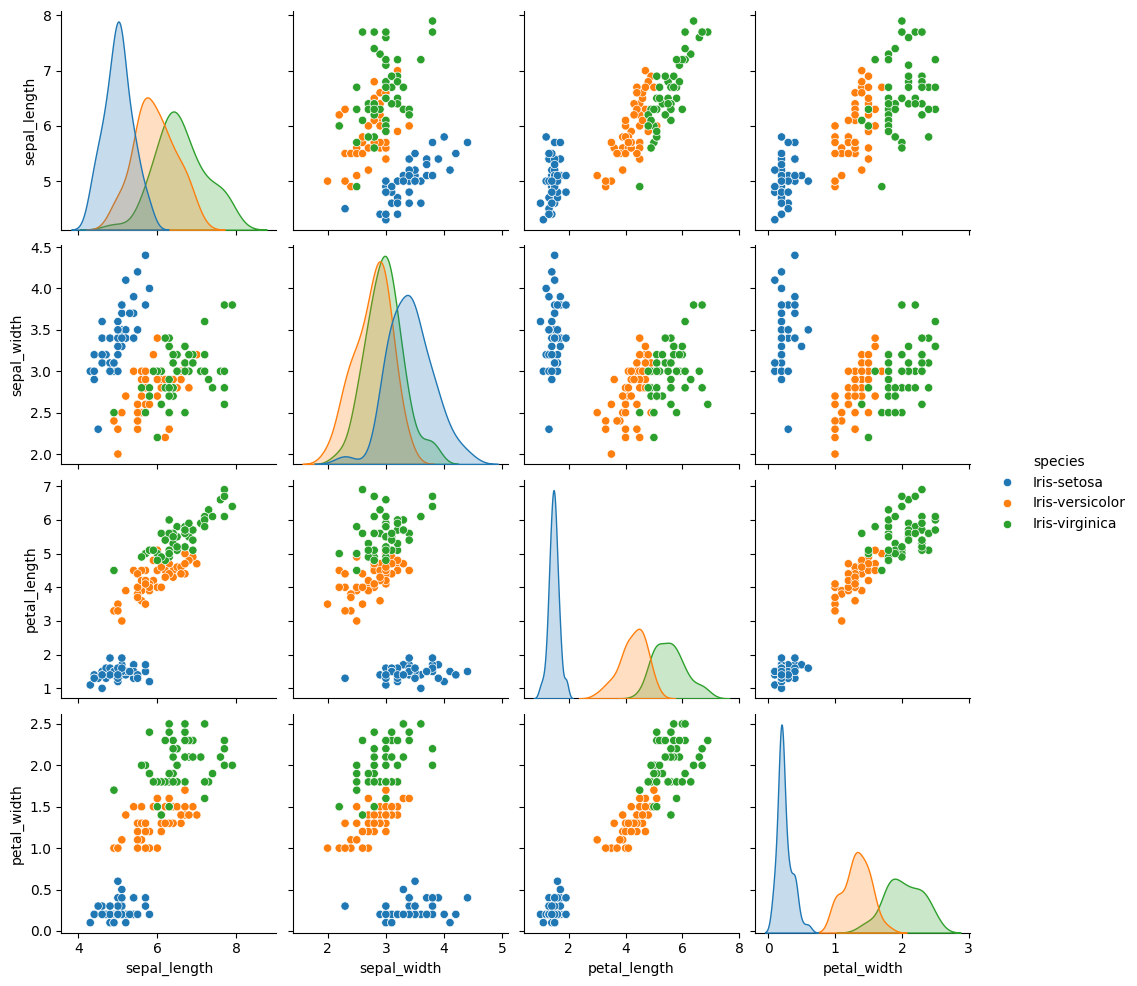

In [29]:
sns.pairplot(df, hue='species')


In [97]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### Iris-setosa is quite distinct from the other two species based on the petal_length and petal_width features, which helps in easy classification.
#### Iris-versicolor and Iris-virginica have more overlapping feature values, making them harder to distinguish just based on one or two features, but combinations of features (e.g., petal_length vs. petal_width) offer better separation.

In [33]:
X=df.drop('species',axis=1)

In [74]:
kmeans=KMeans(n_clusters=3,random_state=42)

In [76]:
kmeans.fit(X)

C:\Anaconda3\envs\imbalanced_test\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [78]:
labels=kmeans.labels_
X['Cluster']=labels

In [80]:
print(X.head())

   sepal_length  sepal_width  petal_length  petal_width  Cluster
0           5.1          3.5           1.4          0.2        1
1           4.9          3.0           1.4          0.2        1
2           4.7          3.2           1.3          0.2        1
3           4.6          3.1           1.5          0.2        1
4           5.0          3.6           1.4          0.2        1


In [82]:
print("Cluster centers:\n", kmeans.cluster_centers_)

print("Inertia:", kmeans.inertia_)

Cluster centers:
 [[ 6.85384615e+00  3.07692308e+00  5.71538462e+00  2.05384615e+00
  -8.88178420e-16]
 [ 5.00600000e+00  3.41800000e+00  1.46400000e+00  2.44000000e-01
   1.00000000e+00]
 [ 5.88360656e+00  2.74098361e+00  4.38852459e+00  1.43442623e+00
   2.00000000e+00]]
Inertia: 78.94506582597731


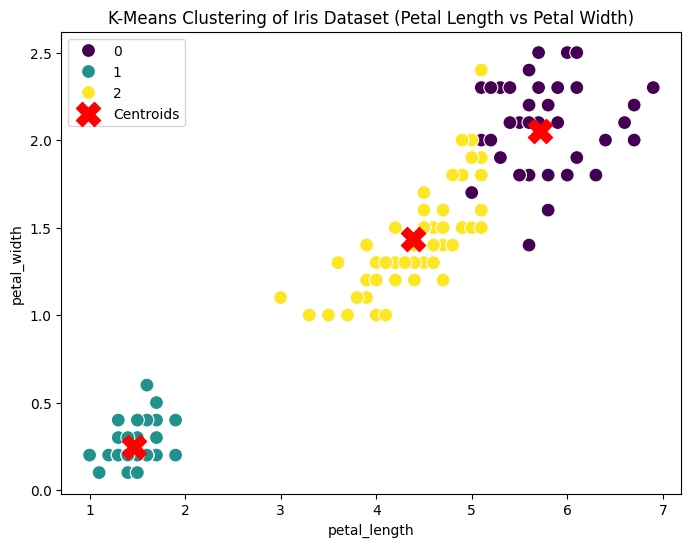

In [84]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['petal_length'], y=X['petal_width'], hue=labels, palette='viridis', s=100)

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red', marker='X', label='Centroids')

plt.title("K-Means Clustering of Iris Dataset (Petal Length vs Petal Width)")
plt.legend()
plt.show()


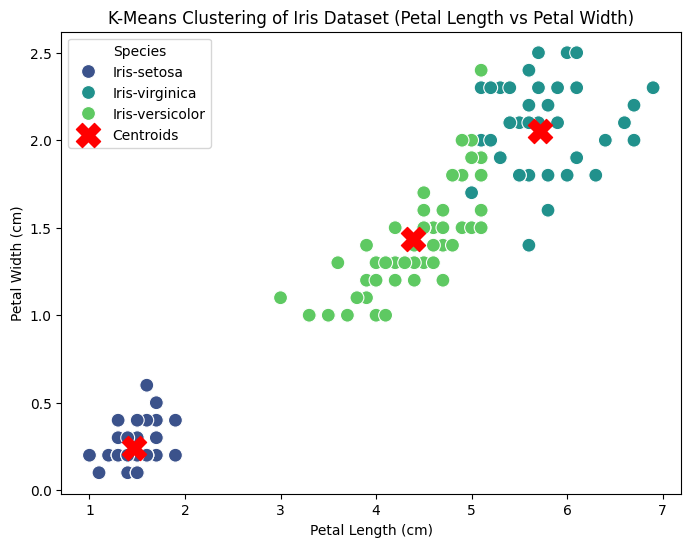

In [103]:
cluster_mapping = {
    0: 'Iris-virginica',
    1: 'Iris-setosa',
    2: 'Iris-versicolor'
}

X['species'] = [cluster_mapping[label] for label in labels]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['petal_length'], y=X['petal_width'], hue=X['species'], palette='viridis', s=100)

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red', marker='X', label='Centroids')

plt.title("K-Means Clustering of Iris Dataset (Petal Length vs Petal Width)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title='Species')
plt.show()

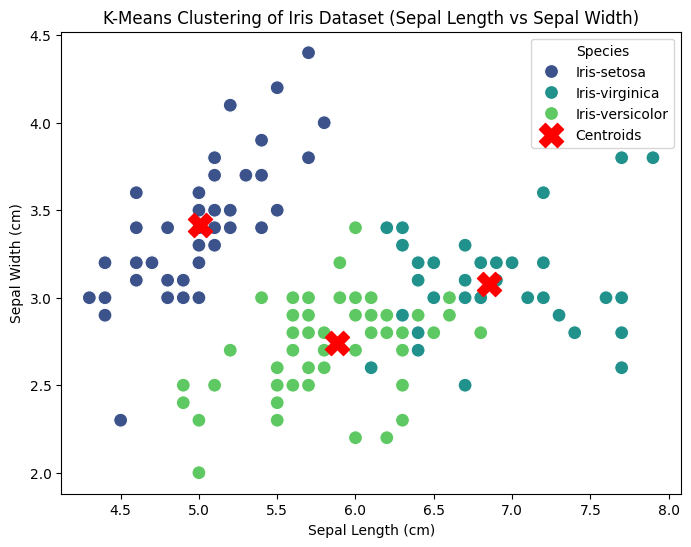

In [107]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['sepal_length'], y=X['sepal_width'], hue=X['species'], palette='viridis', s=100)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title("K-Means Clustering of Iris Dataset (Sepal Length vs Sepal Width)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title='Species')
plt.show()


C:\Anaconda3\envs\imbalanced_test\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda3\envs\imbalanced_test\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda3\envs\imbalanced_test\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda3\envs\imbalanced_test\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

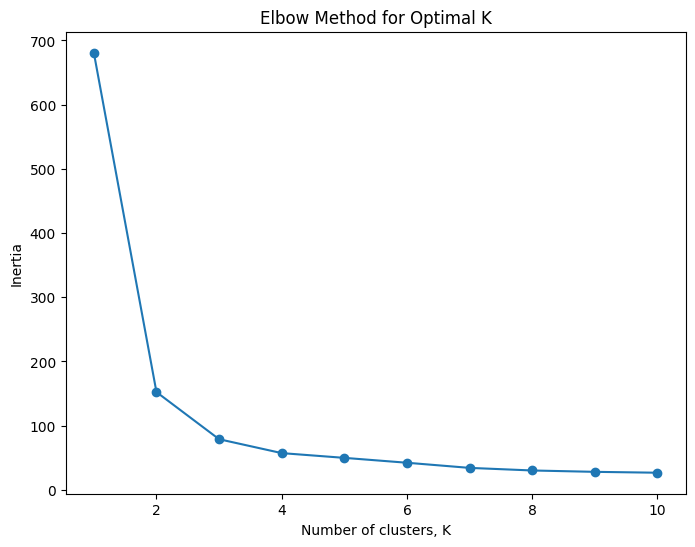

In [86]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    kmeans_model.fit(X.iloc[:, :-1]) 
    inertia.append(kmeans_model.inertia_)

# Plot the inertia for each K
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters, K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In summary, the elbow plot suggests that the optimal number of clusters for your dataset is around K=3, as the inertia decreases sharply up to this point and then flattens out. This indicates that using 3 clusters provides a good balance between simplicity and performance. Adding more clusters beyond this point gives diminishing returns in terms of reducing within-cluster variance.

Choosing K=3 allows for a more interpretable model, where each cluster represents a distinct group in the data. Analyzing the characteristics of these clusters can reveal important patterns and differences between them, such as variations in sepal length, sepal width, petal length, and petal width (in the case of the Iris dataset). Visualizing the clusters will help you assess how well-separated they are and uncover meaningful groupings within the data.

This approach simplifies understanding and helps make data-driven decisions, such as customer segmentation, anomaly detection, or classification.

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


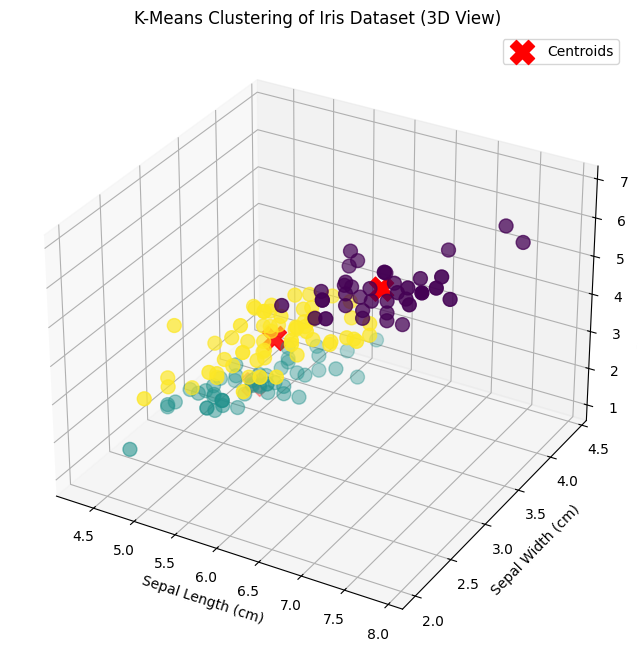

In [111]:
cluster_mapping = {0: 'Iris-virginica', 1: 'Iris-setosa', 2: 'Iris-versicolor'}
df['species'] = [cluster_mapping[label] for label in labels]

print(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']].head())

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X['sepal_length'], X['sepal_width'], X['petal_length'], c=labels, cmap='viridis', s=100)

centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=300, c='red', marker='X', label='Centroids')

ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Sepal Width (cm)")
ax.set_zlabel("Petal Length (cm)")
plt.title("K-Means Clustering of Iris Dataset (3D View)")
plt.legend()
plt.show()